# WTO

In [ ]:
#### COLAB ONLY CELL
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount('/content/gdrive',force_remount=True)
%cd /content/gdrive/MyDrive/COMEXT
%pip install -q powerlaw

Mounted at /content/gdrive
/content/gdrive/MyDrive/COMEXT


In [ ]:
import hashlib, random, math, os, sys, pickle, time, zipfile, io, json#, powerlaw #,eurostat
import pandas as pd
import numpy as np
import networkx as nx
from tqdm.notebook import tqdm, trange
from networkx.classes.function import degree
import matplotlib.pyplot as plt
from matplotlib import cm

sys.path.append('/content/gdrive/MyDrive/COMEXT/comext_graph_analysis/src')
import graph_analysis as g
import wto.wto.time_series_datapoints as w
with open("./comext_graph_analysis/cred_wto.json","r") as f:
    keys = eval(f.read())

In [ ]:
with open("./data-samples/wto/hs6.txt") as f:
    cat = f.read()

In [ ]:
partners = "004,950,008,012,016,020,024,660,028,032,051,533,970,975,036,040,031,044,048,050,052,112,056,058,084,204,060,064,068,535,070,072,074,076,086,096,100,854,108,132,116,120,124,136,140,148,152,156,162,166,170,910,174,178,184,188,384,191,192,531,196,203,180,208,262,212,214,218,818,222,226,232,233,748,231,927,905,918,899,928,228,EUT,ZX9,E28,234,242,246,250,258,260,946,266,270,268,276,288,292,300,304,308,316,320,321,324,624,328,332,334,336,340,344,348,352,356,360,364,368,372,376,380,388,392,393,400,398,404,296,408,410,414,417,418,428,422,426,430,434,438,440,442,446,450,454,458,462,466,470,471,584,478,480,175,484,583,498,496,893,500,504,508,104,516,520,524,528,530,540,554,558,562,566,570,931,807,580,578,512,945,990,586,585,275,591,598,600,604,608,612,616,620,634,642,643,646,654,659,662,534,670,882,674,678,682,686,892,891,690,694,702,703,705,090,706,710,239,728,724,144,736,740,752,756,760,158,762,834,764,626,768,772,776,780,788,792,795,796,798,800,804,784,826,581,840,888,858,860,548,862,704,092,876,887,890,894,716"
# cat = "01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97"
time_periods = [str(y) for y in range(2001,2021)]
pars = partners.split(",")
cats = cat.split(",")
par_lists = []
cat_lists = []
cat_batch = 6538//100
for i in range(101):
    cat_lists += [",".join(cats[cat_batch*i:cat_batch*(i+1)])]
for i in range(10):
    par_lists += [",".join(pars[(255//9)*(i):(255//9)*(i+1)])]

In [ ]:
# for c in tqdm(cat_lists[96:]):
#     for p in tqdm(par_lists,leave=False):
#         w.get_time_series_datapoints("HS_M_0010",keys["primary_key"],frmt="csv",path="./data-samples/wto/bilateral6/",
#                                     partner_economy=p,time_period="2001-2023",product_sector=c,
#                                     max_records=1000000,heading_style="M",output_mode="codes")
#     for f in tqdm(os.listdir("./data-samples/wto/bilateral6/"),leave=False):
#         if "csv" in f:
#             try:
#                 pd.read_csv(f"./data-samples/wto/bilateral6/{f}",encoding="latin",low_memory=False).to_parquet(f"./data-samples/wto/bilateral6/{f.replace('csv','parquet')}")
#                 os.system(f'rm "./data-samples/wto/bilateral6/{f}"')
#             except:
#                 print(f"./data-samples/wto/bilateral6/{f}")

In [ ]:
(len(os.listdir("./data-samples/wto/bilateral6/")))

1015

In [ ]:
# %%shell
# wget -O "./data-samples/wto/bilateral_allyears.zip" "https://api.wto.org/timeseries/v1/data?i=HS_M_0010&p=000&pc=01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97&ps=all&frmt=csv&max=1000000&head=M&mode=codes&subscription-key=843db42db04042f4b82d5f780e54925e"

--2022-06-09 09:27:40--  https://api.wto.org/timeseries/v1/data?i=HS_M_0010&p=000&pc=01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97&ps=all&frmt=csv&max=1000000&head=M&mode=codes&subscription-key=843db42db04042f4b82d5f780e54925e
Resolving api.wto.org (api.wto.org)... 52.174.64.145
Connecting to api.wto.org (api.wto.org)|52.174.64.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘./data-samples/wto/bilateral_allyears.zip’

./data-samples/wto/     [                <=> ]  58.13M  12.7KB/s    in 18m 32s 

2022-06-09 09:46:41 (53.6 KB/s) - ‘./data-samples/wto/bilateral_allyears.zip’ saved [60957750]



In [ ]:
# # w.get_time_series_datapoints()
# with open("./data-samples/wto/bilateral_allyears.zip","rb") as f, open("./data-samples/wto/bilateral_allyears.json","w") as g:
#     # print(encode(f.read(),encoding="utf-8"))
#     # df = pd.DataFrame()
#     g.write(f.read().decode("utf-8").replace("null",'"null"'))
#     # z = zipfile.ZipFile(io.BytesIO(f.read()))
#     # z.extractall(path="./data-samples/wto/bilateral_allyears.csv")

# # df

In [ ]:
# with open("./data-samples/wto/bilateral_allyears.json","r") as g:
#     dic = json.load(g)["Dataset"]

# df = pd.DataFrame(dic)

In [ ]:
# df.to_csv("./data-samples/wto/bilateral_allyears.csv")
df = pd.read_csv("./data-samples/wto/bilateral_allyears.csv")

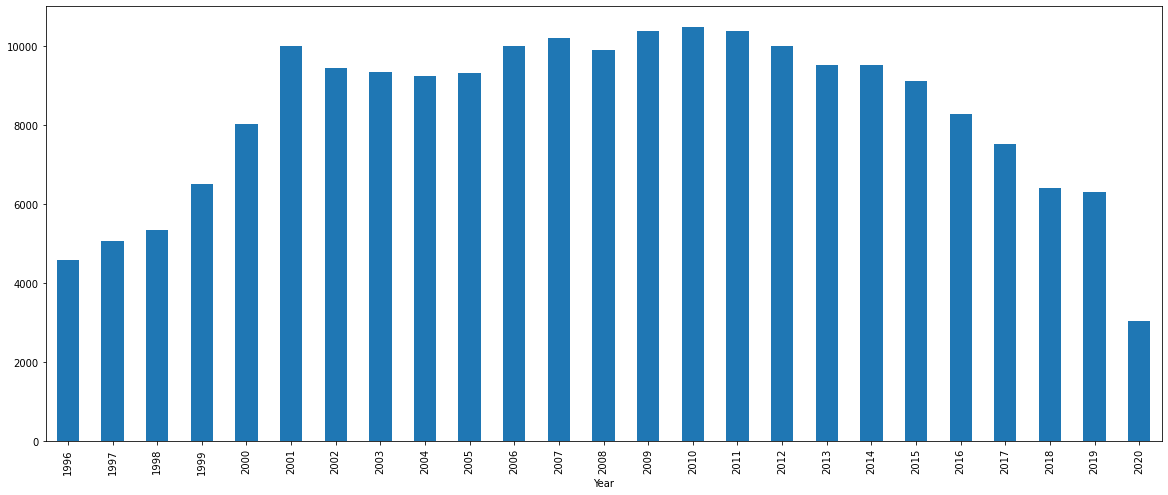

In [ ]:
df.groupby("Year").count().Value.plot.bar(figsize=(20,8))

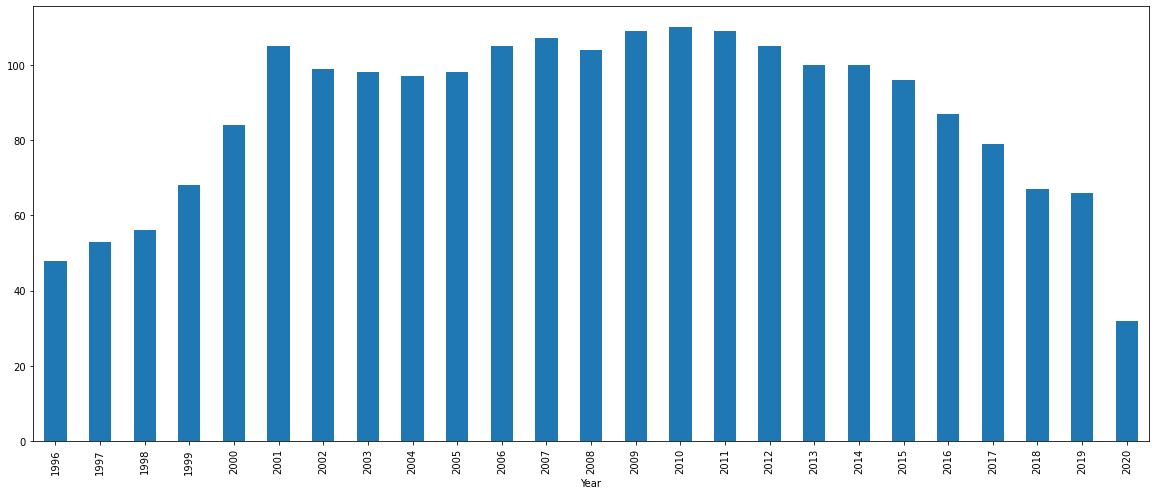

In [ ]:
df.groupby(["ReportingEconomyCode","Year"],as_index=False).count()[["ReportingEconomyCode","Year"]].groupby(["Year"]).count().ReportingEconomyCode.plot.bar(figsize=(20,8))

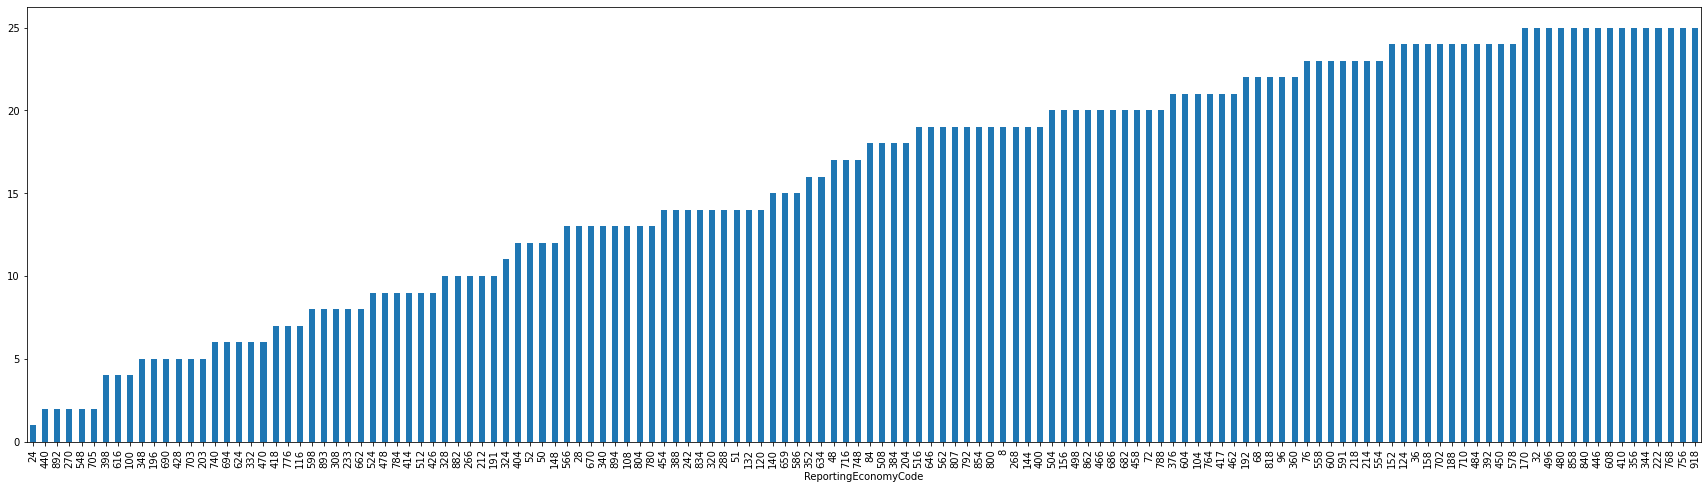

In [ ]:
df.groupby(["ReportingEconomyCode","Year"],as_index=False).count()[["ReportingEconomyCode","Year"]].groupby(["ReportingEconomyCode"]).count().Year.sort_values().plot.bar(figsize=(30,8))

In [ ]:
# for fold in ["bilateral2","bilateral6"]:
#     for f in tqdm(os.listdir("./data-samples/wto/"+fold)):
#         if "csv" in f:
#             try:
#                 pd.read_csv(f"./data-samples/wto/{fold}/{f}",encoding="latin",low_memory=False).to_parquet(f"./data-samples/wto/{fold}/{f.replace('csv','parquet')}")
#                 os.system(f'rm "./data-samples/wto/{fold}/{f}"')
#             except:
#                 print(f"./data-samples/wto/{fold}/{f}")

In [ ]:
# for f in tqdm(os.listdir("./data-samples/wto/prove/")):
#     os.system(f'rm "./data-samples/wto/prove/{f}"')

total 0


In [ ]:
df = pd.read_parquet("./data-samples/wto/bilateral6/TimeseriesApiData_20220601151429.parquet")

In [ ]:
df[(df.Year == 2020)][['ReportingEconomyCode','PartnerEconomyCode',
                        'ProductOrSectorCode', 'UnitCode',
                        'Year', 'ValueFlagCode', 'Value']]

,ReportingEconomyCode,PartnerEconomyCode,ProductOrSectorClassificationCode,ProductOrSectorCode,PeriodCode,FrequencyCode,UnitCode,Year,ValueFlagCode,Value
1518,32,484,HS,901580,A,A,USD,2020,NaN,6749
1519,32,528,HS,901720,A,A,USD,2020,NaN,478
1520,32,484,HS,901812,A,A,USD,2020,NaN,37716
1521,32,484,HS,901820,A,A,USD,2020,NaN,12007
1522,32,528,HS,901813,A,A,USD,2020,NaN,6214439
...,...,...,...,...,...,...,...,...,...,...
138089,918,498,HS,902680,A,A,USD,2020,NaN,2252
138090,918,508,HS,902690,A,A,USD,2020,NaN,834
138091,918,104,HS,902690,A,A,USD,2020,NaN,6144
138092,918,446,HS,902710,A,A,USD,2020,NaN,2701


In [ ]:
wto_dfs = {y:pd.DataFrame() for y in range(2001,2021)}
for f in tqdm(os.listdir("./data-samples/wto/bilateral6/")):
    if "parquet" in f:
        try:
            df = pd.read_parquet("./data-samples/wto/bilateral6/"+f)
        except:
            print(f)
        for y in [y for y in range(2001,2021)]:
            df2 = df[(df.Year == y)][['ReportingEconomyCode','PartnerEconomyCode',
                    'ProductOrSectorCode', 'UnitCode',
                    'Year', 'ValueFlagCode', 'Value']].copy()
            wto_dfs[y] = pd.concat([wto_dfs[y],df2])


  0%|          | 0/1015 [00:00<?, ?it/s]

In [ ]:
for y in tqdm([y for y in range(2001,2021)]):
    wto_dfs[y].drop_duplicates().to_parquet(f"./data-samples/wto/bilateral6_years/wto_df_{y}.parquet")

  0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
reporters = pd.read_json("./data-samples/wto/WTO_ReportingEconomies.json")
partners = pd.read_json("./data-samples/wto/WTO_PartnerEconomies.json")
iso3_to_iso2 = pd.read_csv("./data-samples/population/iso3_to_iso2.csv",na_filter=False)[["alpha-3","alpha-2"]]

In [ ]:
wto_countries = partners[partners.columns[:-1]].merge(reporters[reporters.columns[:-1]],how="outer").merge(iso3_to_iso2, left_on="iso3A",right_on="alpha-3",how="outer")
wto_countries = wto_countries[(~wto_countries.code.isna())]#&(~wto_countries["alpha-2"].isna())]
wto_countries_dic = wto_countries.set_index("code")["alpha-2"].to_dict()

In [ ]:
wto_countries[wto_countries.code == "918"]

,code,iso3A,name,alpha-3,alpha-2
142,918,EEC,European Union,NaN,NaN


In [ ]:
def get_country_code(x):
    return wto_countries_dic[x]

In [ ]:
wto_df_2020 = pd.read_parquet("./data-samples/wto/bilateral6_years/wto_df_2020.parquet")

In [ ]:
# wto_df_2020.ProductOrSectorCode = wto_df_2020.ProductOrSectorCode.apply(lambda x: int2str(x,6))
# wto_df_2020.ReportingEconomyCode = wto_df_2020.ReportingEconomyCode.apply(lambda x: int2str(x,3))
# wto_df_2020.PartnerEconomyCode = wto_df_2020.PartnerEconomyCode.apply(lambda x: int2str(x,3))
wto_df_2020.sort_values("ReportingEconomyCode")#.ReportingEconomyCode.apply(get_country_code)

,ReportingEconomyCode,PartnerEconomyCode,ProductOrSectorCode,UnitCode,Year,ValueFlagCode,Value
943,032,276,930400,USD,2020,NaN,15754
7100,032,152,390720,USD,2020,NaN,118105
7101,032,152,390791,USD,2020,NaN,13656
7105,032,170,382499,USD,2020,NaN,1074324
7106,032,170,390319,USD,2020,NaN,672011
...,...,...,...,...,...,...,...
51589,918,266,300120,USD,2020,NaN,1583
51590,918,320,300215,USD,2020,NaN,110
51591,918,266,300290,USD,2020,NaN,2160
7548,918,484,845640,USD,2020,NaN,104862


,code,iso3A,name,alpha-3,alpha-2
72,004,AFG,Afghanistan,AFG,AF
73,008,ALB,Albania,ALB,AL
74,012,DZA,Algeria,DZA,DZ
75,016,ASM,American Samoa,ASM,AS
76,020,AND,Andorra,AND,AD
...,...,...,...,...,...
305,876,WLF,Wallis and Futuna Islands,WLF,WF
306,887,YEM,Yemen,YEM,YE
308,894,ZMB,Zambia,ZMB,ZM
309,716,ZWE,Zimbabwe,ZWE,ZW


In [ ]:
# wto_df[['ReportingEconomyCode', 'ReportingEconomy',
#        'PartnerEconomyCode', 'PartnerEconomy',
#        'ProductOrSectorCode', 'ProductOrSector', 'UnitCode', 'Year',
#        'ValueFlagCode', 'ValueFlag', 'TextValue', 'Value']].sort_values(["Year","ReportingEconomyCode","PartnerEconomy"]).reset_index(drop=True).to_parquet(
#            "./data-samples/wto/wto_df.parquet"
#        )

In [ ]:
def dig2(x):
    return str(x)[:2]
def int2str(x,l):
    if l == 6:
        return f"{x:06d}"
    elif l == 3:
        return f"{x:03d}"
    elif l == 2:
        return f"{x:02d}"

In [ ]:
wto_df = pd.read_parquet("./data-samples/wto/wto_df.parquet")
wto_df.ProductOrSectorCode = wto_df.ProductOrSectorCode.apply(int2str)

In [ ]:
hs_cpa = pd.read_csv("./data-samples/nomenclature/HS_2007-CPA_2008.csv",converters={"HS 2007":dig2,"CPA 2008":dig2})

In [ ]:
cpa21_08 = pd.read_csv("./data-samples/nomenclature/CPA_2.1-CPA_2008.csv",converters={"CPA 2.1":dig2,"CPA 2008":dig2})

In [ ]:
batch = wto_df.shape[0] // 100
wto_df_cpa = pd.DataFrame()
for i in trange(101):
    print(wto_df.iloc[i*batch:(i+1)*batch].shape[0])
    # wto_df_cpa = pd.concat([wto_df_cpa,wto_df.iloc[i*batch:(i+1)*batch].merge(cpa21_08.merge(hs_cpa),left_on="ProductOrSectorCode",right_on="HS 2007")])

In [ ]:
wto_df.iloc[i*batch:(i+1)*batch].merge(cpa21_08.merge(hs_cpa)[["HS 2007"]],left_on="ProductOrSectorCode",right_on="HS 2007")

In [ ]:
wto_df[["ProductOrSector","ProductOrSectorCode"]].drop_duplicates()

In [ ]:
hs_cpa.drop_dup

In [ ]:
wto_df_cpa.head()

In [ ]:
wto_df[["ProductOrSectorCode"]].merge(cpa21_08.merge(hs_cpa),left_on="ProductOrSectorCode",right_on="HS 2007")